<a href="https://colab.research.google.com/github/xadrijo/neural-network-regression-tensorflow/blob/main/neural_network_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal

In [3]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read in the insurance dataset
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# One-hot encode the Dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [9]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [10]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [13]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8530.4619 - mae: 8530.4619
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7815.2197 - mae: 7815.2197
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7622.1934 - mae: 7622.1934
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7734.1729 - mae: 7734.1729
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.4688 - mae: 7693.4688
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.6631 - mae: 7644.6631
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7524.5298 - mae: 7524.5298
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7761.9097 - mae: 7761.9097
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7546.9556 - mae: 7546.9556
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7707.6807 - mae: 7707.6807

In [14]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 8677.1875 - mae: 8677.1875


[8677.1875, 8677.1875]

In [15]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

· It looks like our model isn't performing too well... let's try and improve it.

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])


# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13255.3320 - mae: 13255.3320
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13059.7119 - mae: 13059.7119
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12665.0938 - mae: 12665.0938
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11911.1826 - mae: 11911.1826
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10694.0986 - mae: 10694.0986
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9220.4414 - mae: 9220.4414
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7970.9961 - mae: 7970.9961
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7485.3013 - mae: 7485.3013
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7419.9429 - mae: 7419.9429
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7400.4316 - mae:

In [20]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 10ms/step - loss: 4772.2158 - mae: 4772.2158


[4772.2158203125, 4772.2158203125]

In [21]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8677.1875 - mae: 8677.1875


[8677.1875, 8677.1875]

In [24]:
# try again
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X, y, epochs=200)

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 13199.8564 - mae: 13199.8564
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 12956.4736 - mae: 12956.4736
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 12371.6807 - mae: 12371.6807
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 11173.2080 - mae: 11173.2080
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 9429.5947 - mae: 9429.5947
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 7954.8228 - mae: 7954.8228
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 7473.9307 - mae: 7473.9307
Epoch 8/200
42/42 [==============================] - 0s 2ms/step - loss: 7410.3477 - mae: 7410.3477
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 7383.6553 - mae: 7383.6553
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 7356.5352 - mae: 7

In [25]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3294.7839 - mae: 3294.7839


[3294.783935546875, 3294.783935546875]

In [26]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8677.1875 - mae: 8677.1875


[8677.1875, 8677.1875]

Text(0.5, 0, 'epochs')

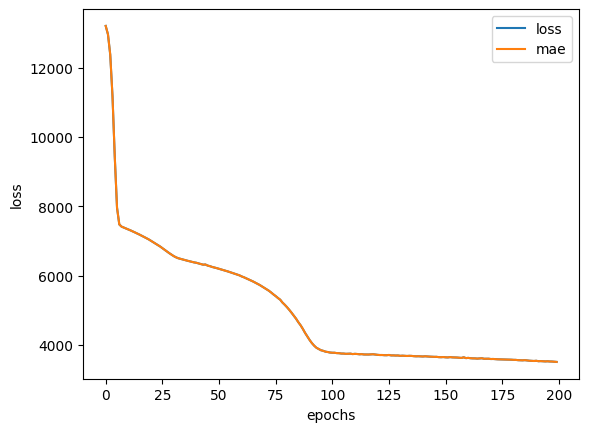

In [27]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🧐 **Question:** How long should I train for?

Tensoflow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

In [28]:
# Let's reinstantiate the dataset

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MixMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [32]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [33]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [34]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Our data has been normalized and one hot encoded. now let's build a neural network model on it.

In [35]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.2471 - mae: 13343.2471
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13332.4824 - mae: 13332.4824
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13305.9756 - mae: 13305.9756
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13252.1982 - mae: 13252.1982
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13160.3184 - mae: 13160.3184
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13019.3945 - mae: 13019.3945
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12818.7041 - mae: 12818.7041
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12548.2383 - mae: 12548.2383
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12198.2266 - mae: 12198.2266
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11769.11

In [36]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3431.7556 - mae: 3431.7556


[3431.755615234375, 3431.755615234375]

In [37]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 10ms/step - loss: 4772.2158 - mae: 4772.2158